<a href="https://colab.research.google.com/github/surya323-ma/data-analytics-/blob/main/Exploring_Global_Terrorism_Patterns_%26_Trends_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded=files.upload()
file_name = next(iter(uploaded))
df=pd.read_excel(file_name)
print(df.columns)
df.head()

Saving 1730285402-Global Terrorism Index 2023.xlsx to 1730285402-Global Terrorism Index 2023.xlsx
Index(['iso3c', 'Country', 'Rank', 'Score', 'Incidents', 'Fatalities',
       'Injuries', 'Hostages', 'Year'],
      dtype='object')


,iso3c,Country,Rank,Score,Incidents,Fatalities,Injuries,Hostages,Year
0,IRQ,Iraq,1,9.599967,1288,2086,5050,16,2012
1,PAK,Pakistan,2,9.152620,638,1322,2297,160,2012
2,AFG,Afghanistan,3,9.134265,507,1511,2612,67,2012
3,SYR,Syria,4,8.238079,168,1014,1833,71,2012
4,YEM,Yemen,5,8.098513,219,651,798,121,2012


In [3]:
df.describe()

,Rank,Score,Incidents,Fatalities,Injuries,Hostages,Year
count,1793.000000,1793.000000,1793.000000,1793.000000,1793.000000,1793.000000,1793.00000
mean,71.691578,2.442817,26.699944,53.537646,74.588957,10.149470,2017.00000
std,35.235705,2.654876,109.500965,253.912698,415.669549,82.306937,3.16316
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2012.00000
25%,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2014.00000
50%,82.000000,1.534965,0.000000,0.000000,0.000000,0.000000,2017.00000
75%,106.000000,4.419243,4.000000,2.000000,4.000000,0.000000,2020.00000
max,112.000000,10.000000,1673.000000,4514.000000,9479.000000,2727.000000,2022.00000


In [4]:
df.isna().sum()

,0
iso3c,0
Country,0
Rank,0
Score,0
Incidents,0
Fatalities,0
Injuries,0
Hostages,0
Year,0


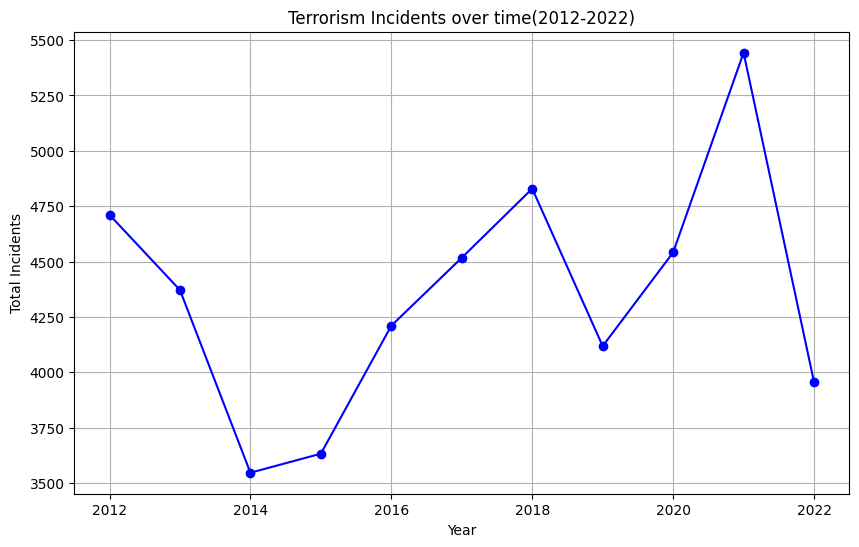

In [5]:
yearly_totals=df.groupby('Year')['Incidents'].sum().reset_index()
plt.figure(figsize=(10,6))
plt.plot(yearly_totals['Year'],yearly_totals['Incidents'],marker='o',linestyle='-',color='b')
plt.title('Terrorism Incidents over time(2012-2022)')
plt.xlabel('Year')
plt.ylabel('Total Incidents')
plt.grid(True)
plt.show()

In [6]:
total_incidents_by_country=df.groupby('Country')['Incidents'].sum().reset_index()
top_10_countries=total_incidents_by_country.nlargest(10,'Incidents')
print(top_10_countries)

         Country  Incidents
66          Iraq      11183
0    Afghanistan       4443
109     Pakistan       3358
130      Somalia       2951
63         India       2872
105      Nigeria       1718
29      Colombia       1716
89          Mali       1636
98       Myanmar       1575
139        Syria       1551


In [7]:
df['Year']=df['Year'].astype(int)

In [8]:
yearly_totals=df.groupby('Year')['Incidents'].sum().reset_index()

In [9]:
yearly_totals=df.groupby(['Year','Country'])['Incidents'].sum().reset_index()
pivot_table=yearly_totals.pivot(index='Year',columns='Country',values='Incidents').fillna(0)

In [10]:
pivot_table_transposed = pivot_table.T
increase = pivot_table_transposed[2022] - pivot_table_transposed[2018]

In [11]:
top_countries=increase.sort_values(ascending=False).head(10).index
top_countries_data=pivot_table_transposed.loc[top_countries]

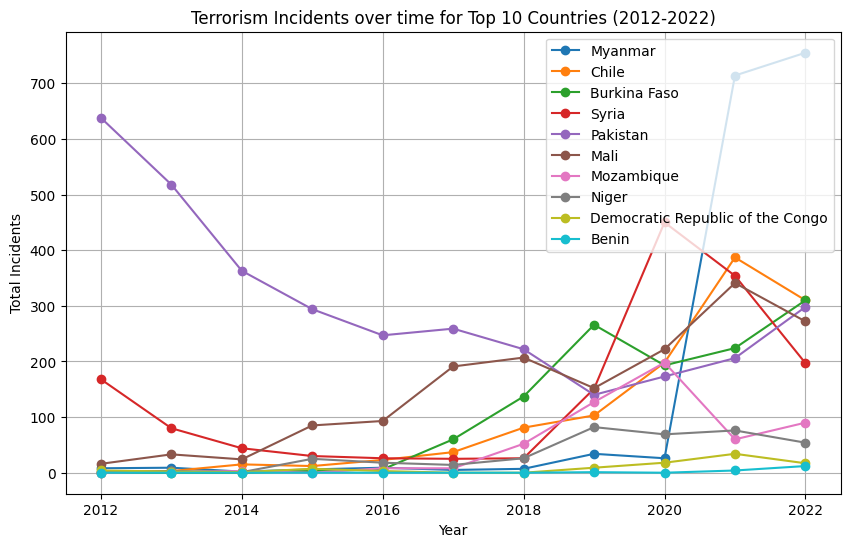

In [12]:
plt.figure(figsize=(10,6))
for country in top_countries_data.index:
  plt.plot(top_countries_data.columns,top_countries_data.loc[country],label=country,marker='o',linestyle='-')

plt.title('Terrorism Incidents over time for Top 10 Countries (2012-2022)')
plt.xlabel('Year')
plt.ylabel('Total Incidents')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

In [14]:
df['Year']=df['Year'].astype(int)

In [15]:
yearly_totals=df.groupby(['Year','Country'])['Incidents'].sum().reset_index()

In [16]:
pivot_table=yearly_totals.pivot(index='Year',columns='Country',values='Incidents').fillna(0)

In [18]:
decrease=pivot_table.loc[2022]-pivot_table.loc[2018]

In [19]:
top_countries_decrease=decrease.sort_values(ascending=True).head(10).index

In [21]:
top_countries_data_decrease=pivot_table_transposed.loc[top_countries_decrease]

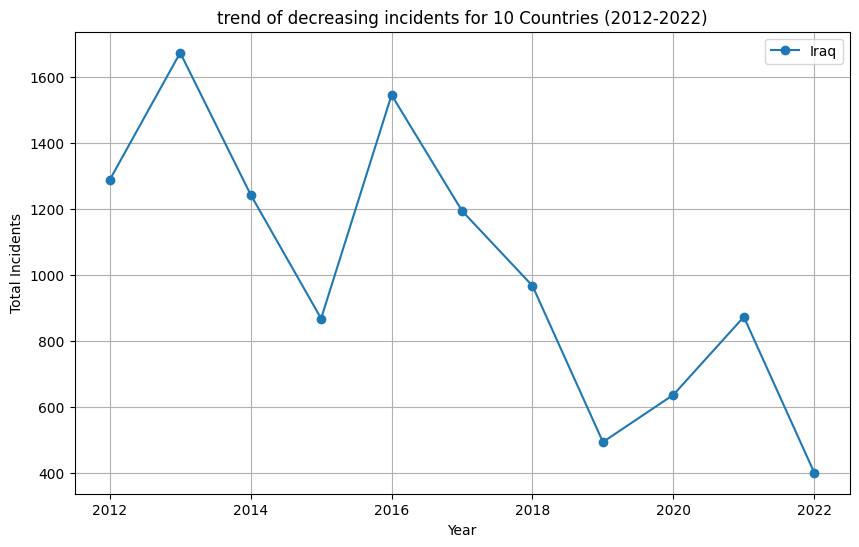

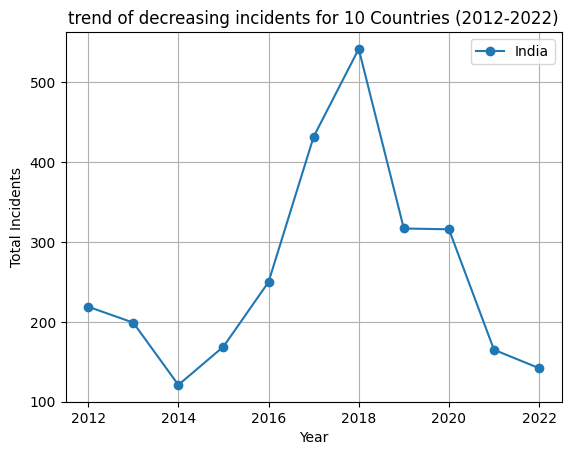

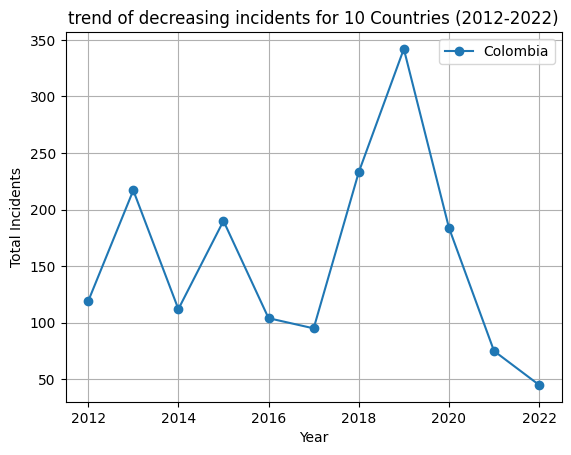

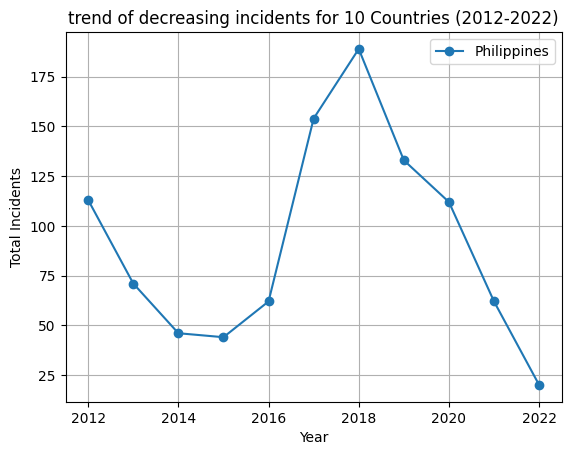

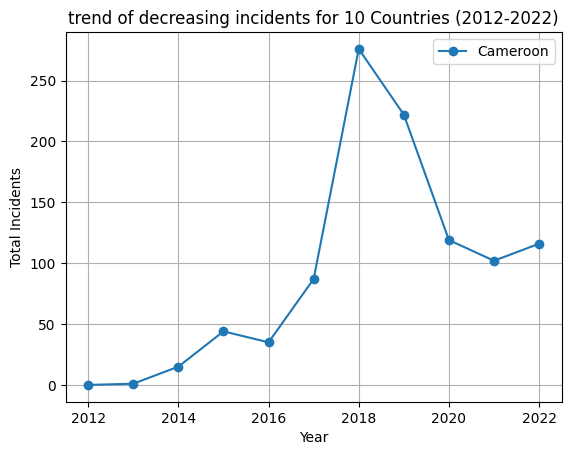

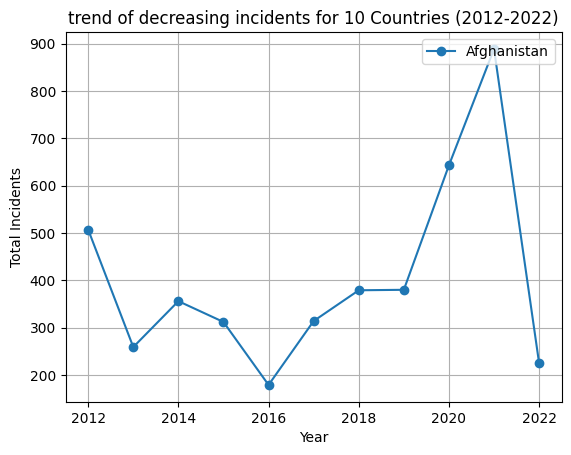

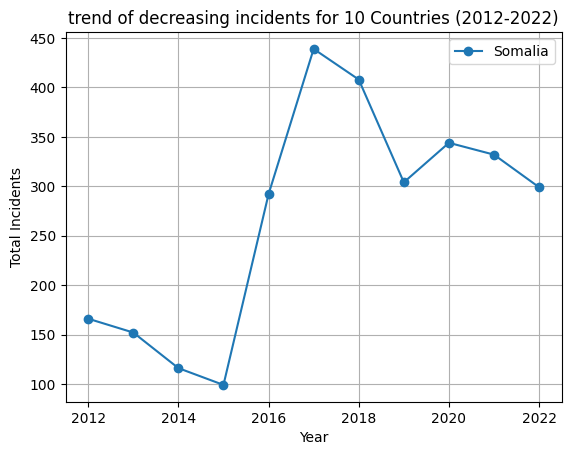

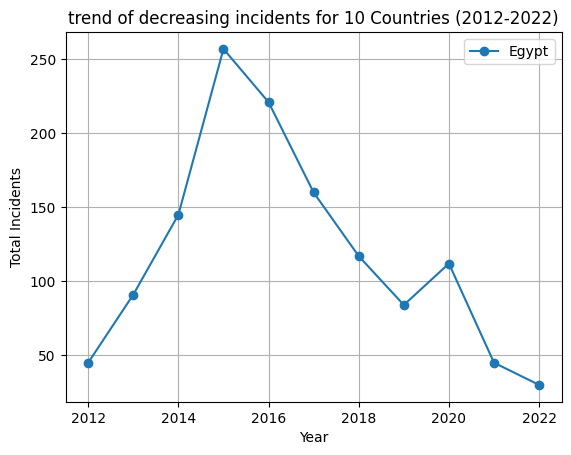

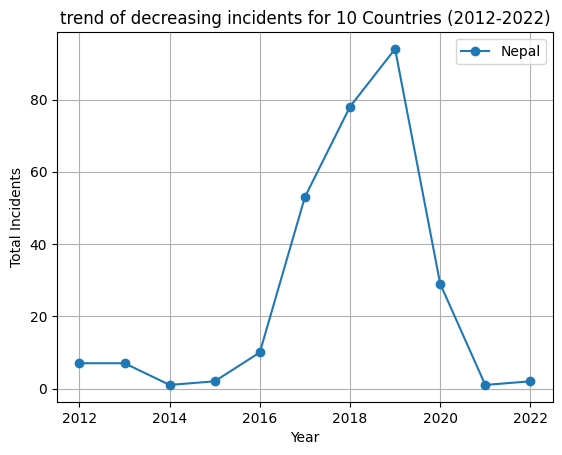

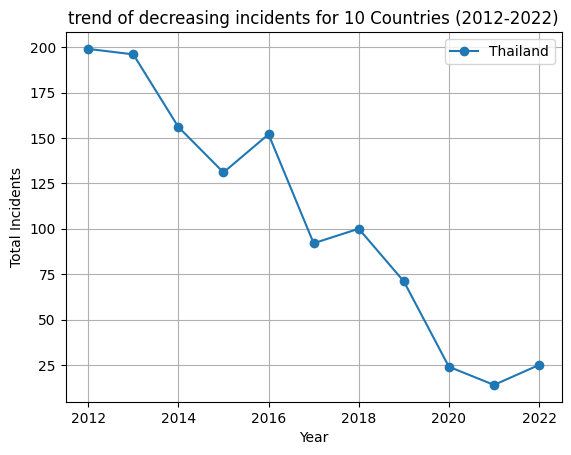

In [23]:
plt.figure(figsize=(10,6))
for country in top_countries_data_decrease.index:
  plt.plot(top_countries_data_decrease.columns,top_countries_data_decrease.loc[country],label=country,marker='o',linestyle='-')
  plt.title('trend of decreasing incidents for 10 Countries (2012-2022)')
  plt.xlabel('Year')
  plt.ylabel('Total Incidents')
  plt.legend(loc='upper right')
  plt.grid(True)
  plt.show()

In [25]:
df['Year']=df['Year'].astype(int)

In [27]:
top_countries_by_year=pd.DataFrame(columns=['Year','Country','Incidents'])

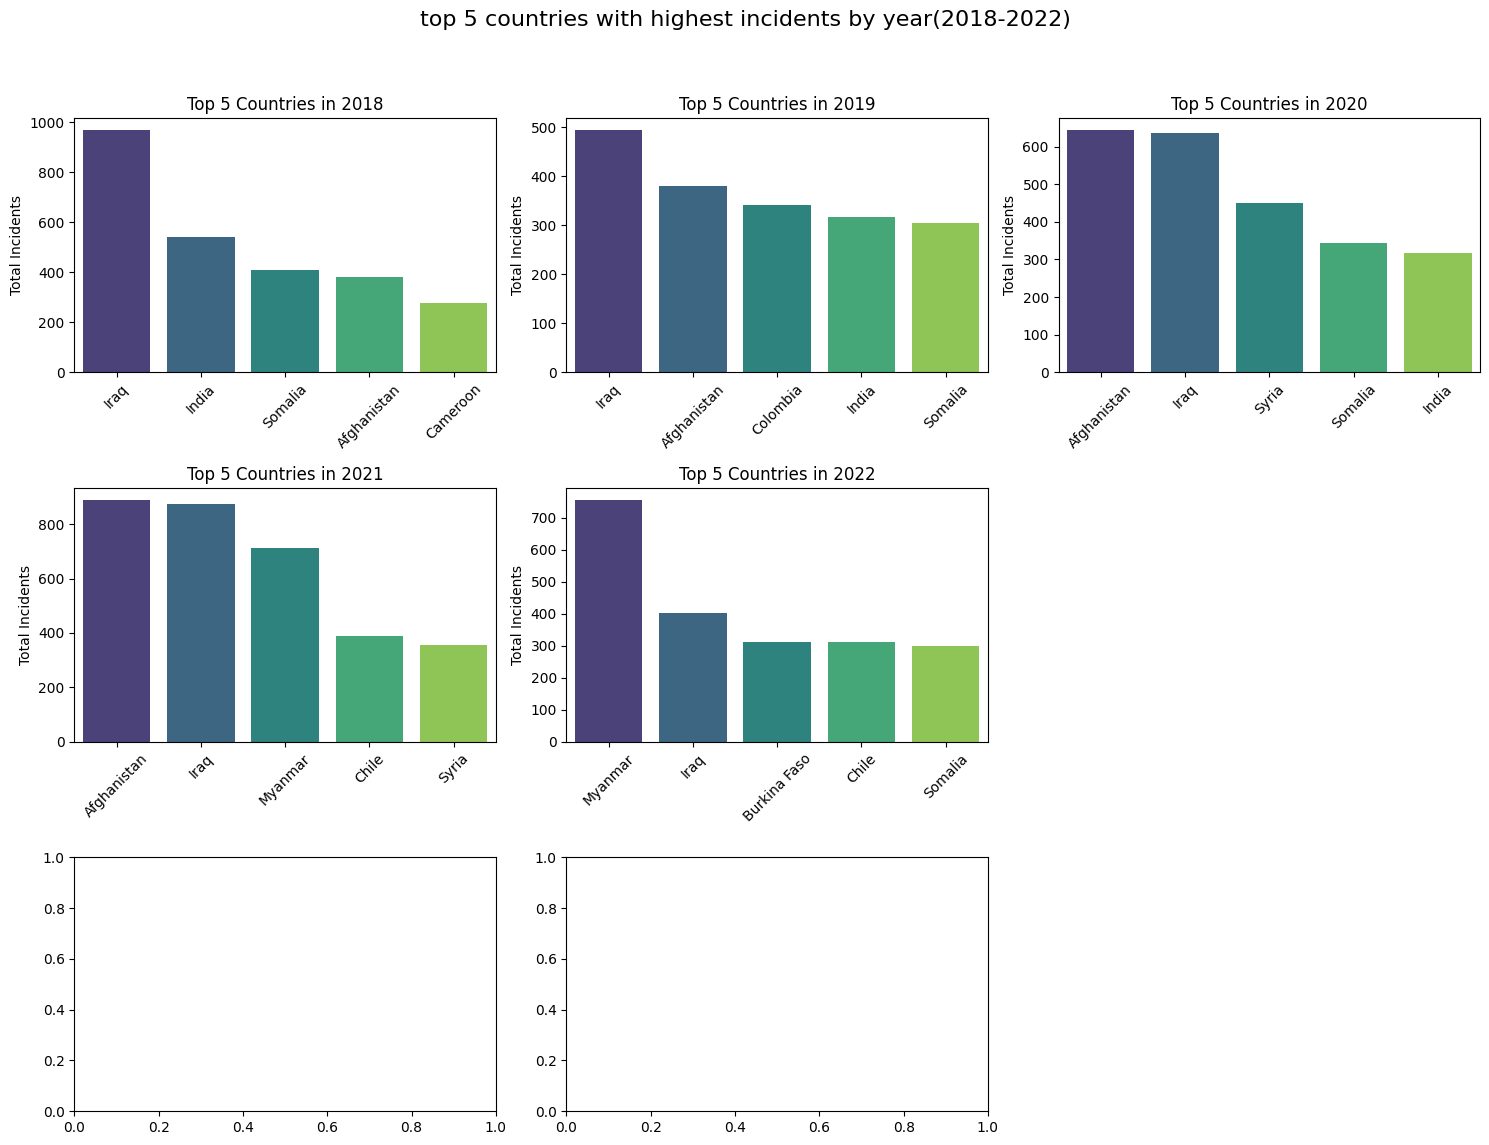

In [31]:
fig, axs = plt.subplots(nrows=3,ncols=3,figsize=(15,12))
fig.suptitle('top 5 countries with highest incidents by year(2018-2022)',fontsize=16)
row = 0
col = 0
for year in range(2018,2023):
  incidents_year=df[df['Year']==year]
  top_countries = incidents_year.groupby('Country')['Incidents'].sum().nlargest(5).reset_index()
  top_countries_year = top_countries.sort_values(by='Incidents',ascending=False).head(5)
  top_countries_year['Year'] = year
  top_countries_by_year = pd.concat([top_countries_by_year, top_countries_year])

  # Plotting for each year
  ax = axs[row, col]
  sns.barplot(x='Country', y='Incidents', data=top_countries_year, ax=ax, palette='viridis')
  ax.set_title(f'Top 5 Countries in {year}')
  ax.set_xlabel('')
  ax.set_ylabel('Total Incidents')
  ax.tick_params(axis='x', rotation=45)

  col += 1
  if col == 3:
      col = 0
      row += 1

# Hide any unused subplots
for i in range(row, 3):
    for j in range(col, 3):
        fig.delaxes(axs[i, j])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [32]:
total_fatalities_by_year=df.groupby('Year')['Fatalities'].sum().reset_index()

In [33]:
top_5_years_fatalities=total_fatalities_by_year.nlargest(5,'Fatalities')

In [34]:
df['Year']=df['Year'].astype(int)
fatalities_2019=df[df['Year']==2019]

In [36]:
fatalities_by_country_2019=fatalities_2019.groupby('Country')['Fatalities'].sum().reset_index()

In [37]:
top_10_countries_2019=fatalities_by_country_2019.nlargest(10,'Fatalities')

In [38]:
print(top_10_countries_2019)

          Country  Fatalities
0     Afghanistan        1194
130       Somalia         693
105       Nigeria         688
20   Burkina Faso         682
66           Iraq         533
89           Mali         389
139         Syria         368
97     Mozambique         348
23       Cameroon         288
104         Niger         282


In [39]:
df['Year']=df['Year'].astype(int)
fatalities_2019=df[df['Year']==2019]
fatalities_by_country_2019=fatalities_2019.groupby('Country')['Fatalities'].sum().reset_index()
top_10_countries_2019=fatalities_by_country_2019.nlargest(10,'Fatalities')

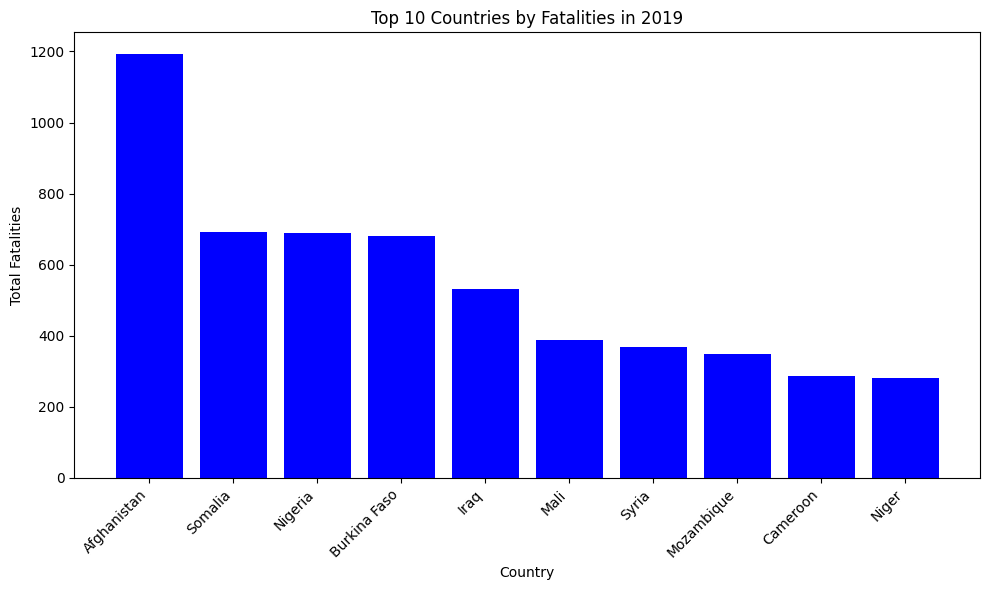

In [41]:
plt.figure(figsize=(10,6))
plt.bar(top_10_countries_2019['Country'],top_10_countries_2019['Fatalities'],color='b')
plt.title('Top 10 Countries by Fatalities in 2019')
plt.xlabel('Country')
plt.ylabel('Total Fatalities')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [44]:
df['Year']=df['Year'].astype(int)
rank_1_data=df[df['Rank']==1]
rank_1_counts=rank_1_data['Country'].value_counts().reset_index()
for country,count in rank_1_counts.items():
  print(f'Country : {country},Count:{count}')

Country : Country,Count:0           Iraq
1    Afghanistan
Name: Country, dtype: object
Country : count,Count:0    7
1    4
Name: count, dtype: int64


In [45]:
df['Year']=df['Year'].astype(int)
iraq_data=df[df['Country']=='Iraq']
iraq_fatalities=iraq_data.groupby('Year')['Fatalities'].sum().reset_index()

In [46]:
afghaistan_data=df[df['Country']=='Afghanistan']
afghanistan_fatalities=afghaistan_data.groupby('Year')['Fatalities'].sum().reset_index()

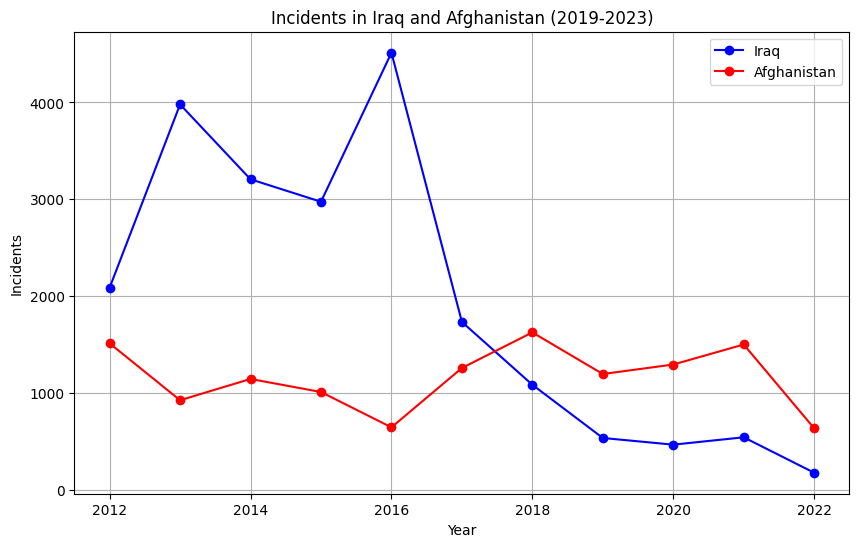

In [51]:
plt.figure(figsize=(10,6))
plt.plot(iraq_data['Year'],iraq_data['Fatalities'],marker='o',linestyle='-',color='b',label='Iraq')
plt.plot(afghaistan_data['Year'],afghaistan_data['Fatalities'],marker='o',linestyle='-',color='r',label='Afghanistan')
plt.title('Incidents in Iraq and Afghanistan (2019-2023)')
plt.xlabel('Year')
plt.ylabel('Incidents')
plt.legend()
plt.grid(True)
plt.show()

In [52]:
correlation_matrix=df[['Incidents','Score','Fatalities','Injuries']].corr()
print(correlation_matrix)

            Incidents     Score  Fatalities  Injuries
Incidents    1.000000  0.516868    0.860467  0.863206
Score        0.516868  1.000000    0.479365  0.410757
Fatalities   0.860467  0.479365    1.000000  0.912888
Injuries     0.863206  0.410757    0.912888  1.000000


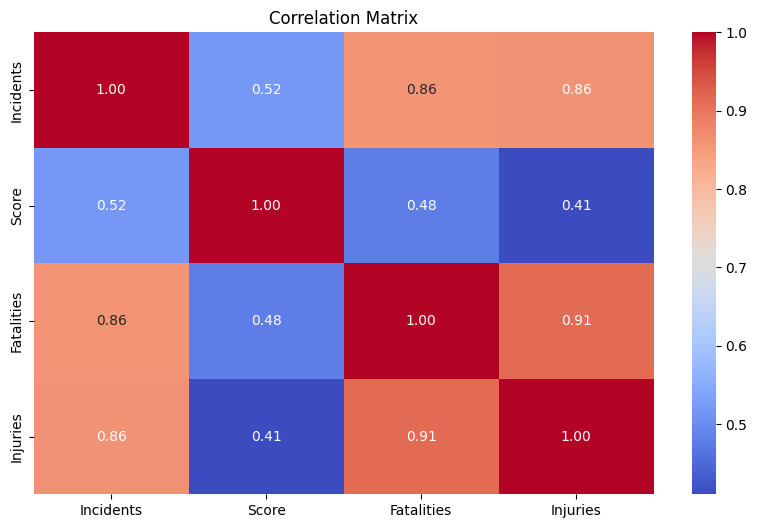

In [53]:
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Matrix')
plt.show()